In [36]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#pip install -U textblob
import textblob
#pip install -U textblob-de
from textblob_de import TextBlobDE
#pip install seaborn
import seaborn as sns

import nltk


<h1 style="text-align:left;color:azure;background-color:red"><br> Import CSV<br></h1>

In [37]:
df = pd.read_csv('D:/refugeeks_project/Beispieldatensatz Klinikbewertungen.csv') #index_col=0
df.head()

,Klinikname,Nutzername,Titel,Datum,Behandlungsjahr,Berichtet als,Daumen hoch/runter,Fachbereich,Gesamtzufriedenheit,Textuell Gesamtzufriedenheit,...,Ausstattung und Gestaltung,Textuell Ausstattung und Gestaltung,Pro,Kontra,Krankheitsbild,Privatpatient,Erfahrungsbericht,Kommentare,URL,Extraktionsdatum
0,MediClin Seepark Klinik,Noname136,Organisation ist ein Fremdwort,19.05.2021,Jahr der Behandlung: 20121,berichtet als Patient,Kein Daumen hoch/runter,Psychosomatik,2,weniger zufrieden\n,...,2,weniger zufrieden\n,"Die Schwestern der MZ, Ernährungstherapeuten",siehe Bericht,"Bulemie, Depressionen",nein,Hatte mir mehr versprochen Die Organisation l...,Kein Kommentar,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021
1,MediClin Seepark Klinik,noname22,Es war die Hölle auf Erden,11.04.2021,Jahr der Behandlung: 18,berichtet als Patient,Daumen runter,Psychosomatik,0,unzufrieden\n,...,2,weniger zufrieden (In den Zimmern roch es nach...,die Kunsttherapie war klasse!,Therapeuten; das Essen; Ich als Patient wurde ...,Depression,nein,Es war die absolute Hölle! Die Therapeuten ka...,Kein Kommentar,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021
2,MediClin Seepark Klinik,Cl.A.,Abschlussbericht,11.04.2021,Jahr der Behandlung: 2020,berichtet als Patient,Daumen runter,Psychosomatik,0,unzufrieden (Siehe oben)\n,...,2,weniger zufrieden (Null acht fünfzehn- Program...,-,Nein siehe oben!!!!!!!,Nachsorge und Begleitung nach einer Magen-Oper...,nein,Als grundpositiv eingestellter Mensch wollte i...,Kein Kommentar,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021
3,MediClin Seepark Klinik,xx.,Zum größten Teil nicht weiter zu empfehlen,04.04.2021,Jahr der Behandlung: 2020 /21,berichtet als Patient,Kein Daumen hoch/runter,Psychosomatik,2,weniger zufrieden\n,...,2,weniger zufrieden\n,Das Essen,"Die Mitarbeiter, Chefarzt, Therapien",Anorexie,nein,Ich war für ca 5 Monate in der Klinik gewesen....,Kein Kommentar,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021
4,MediClin Seepark Klinik,Ellie.,Durchaus ein Ort zum Genesen,28.03.2021,Jahr der Behandlung: 2020,berichtet als Patient,Daumen hoch,Psychosomatik,4,zufrieden\n,...,6,sehr zufrieden\n,Direkte (aber nette) und offene Art mit der Er...,-,"Anorexie, Depressionen",nein,"Als ich in die Klinik ankam, wurde ich freundl...",Kein Kommentar,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021


In [3]:
df.shape

(3032, 26)

In [4]:
my_df = df[['Klinikname','Titel', 'Datum', 'Fachbereich', 'Gesamtzufriedenheit', 'Erfahrungsbericht', 'Behandlungsjahr']]
my_df.head()

,Klinikname,Titel,Datum,Fachbereich,Gesamtzufriedenheit,Erfahrungsbericht,Behandlungsjahr
0,MediClin Seepark Klinik,Organisation ist ein Fremdwort,19.05.2021,Psychosomatik,2,Hatte mir mehr versprochen Die Organisation l...,Jahr der Behandlung: 20121
1,MediClin Seepark Klinik,Es war die Hölle auf Erden,11.04.2021,Psychosomatik,0,Es war die absolute Hölle! Die Therapeuten ka...,Jahr der Behandlung: 18
2,MediClin Seepark Klinik,Abschlussbericht,11.04.2021,Psychosomatik,0,Als grundpositiv eingestellter Mensch wollte i...,Jahr der Behandlung: 2020
3,MediClin Seepark Klinik,Zum größten Teil nicht weiter zu empfehlen,04.04.2021,Psychosomatik,2,Ich war für ca 5 Monate in der Klinik gewesen....,Jahr der Behandlung: 2020 /21
4,MediClin Seepark Klinik,Durchaus ein Ort zum Genesen,28.03.2021,Psychosomatik,4,"Als ich in die Klinik ankam, wurde ich freundl...",Jahr der Behandlung: 2020


In [40]:
df = df[['Klinikname', 'Gesamtzufriedenheit', 'Erfahrungsbericht']]
df.head()

,Klinikname,Gesamtzufriedenheit,Erfahrungsbericht
0,MediClin Seepark Klinik,2,Hatte mir mehr versprochen Die Organisation l...
1,MediClin Seepark Klinik,0,Es war die absolute Hölle! Die Therapeuten ka...
2,MediClin Seepark Klinik,0,Als grundpositiv eingestellter Mensch wollte i...
3,MediClin Seepark Klinik,2,Ich war für ca 5 Monate in der Klinik gewesen....
4,MediClin Seepark Klinik,4,"Als ich in die Klinik ankam, wurde ich freundl..."


In [41]:
df.to_csv('D:/refugeeks_project/ml_py/my_df1.csv', index=False)

In [5]:
my_df.loc[my_df['Gesamtzufriedenheit'] == 4] #alle 6 Bewertungen

,Klinikname,Titel,Datum,Fachbereich,Gesamtzufriedenheit,Erfahrungsbericht,Behandlungsjahr
4,MediClin Seepark Klinik,Durchaus ein Ort zum Genesen,28.03.2021,Psychosomatik,4,"Als ich in die Klinik ankam, wurde ich freundl...",Jahr der Behandlung: 2020
7,MediClin Seepark Klinik,Gute Klinik aber...,16.11.2020,Psychosomatik,4,Ich war selbst mehrfach im Akutbereich der SPK...,Jahr der Behandlung: 2020
12,MediClin Seepark Klinik,Hervorragende Klinik,08.07.2020,Psychosomatik,4,Hallo! Die Klinik ist hervorragend bei der Dia...,Jahr der Behandlung: 20
14,MediClin Seepark Klinik,Gute Klinik,11.06.2020,Psychosomatik,4,Ich war von Januar bis April 2016 in der Medic...,Jahr der Behandlung: 2016
15,MediClin Seepark Klinik,Reha trotz Corona,25.04.2020,Psychosomatik,4,Ich bin aufgrund von Borderline und Depersonal...,Jahr der Behandlung: 2020
...,...,...,...,...,...,...,...
2972,Ammerland-Klinik,GEHT NICHT IN DIE GESAMBEWERTUNG EIN - Untersu...,28.03.2008,Neurologie,4,Ausführliche und zügige Untersuchungen. Guter ...,Jahr der Behandlung: 2008
2976,Ammerland-Klinik,GEHT NICHT IN DIE GESAMBEWERTUNG EIN - Klasse ...,03.10.2007,\nGefäßchirurgie\n,4,2004 war ich Pat. in der Klinik.Alles war sehr...,Jahr der Behandlung: 2004
2995,Bundeswehrkrankenhaus Westerstede,Top Aerzte und tolles Team!!!,10.01.2018,\nNeurochirurgie\n,4,Ärzte sind jung aber haben voll Ahnung.Bin zum...,Jahr der Behandlung: 18
2997,Bundeswehrkrankenhaus Westerstede,GEHT NICHT IN DIE GESAMBEWERTUNG EIN - Hat die...,17.08.2017,Neurologie,4,Auf Grund einer Übermedikamentierung durch ei...,Jahr der Behandlung: 2017


In [6]:
my_df.describe()

,Gesamtzufriedenheit
count,3032.000000
mean,3.809367
std,2.593664
min,0.000000
25%,0.000000
50%,6.000000
75%,6.000000
max,6.000000


In [7]:
my_df.sort_values(['Gesamtzufriedenheit']) #Sorting

,Klinikname,Titel,Datum,Fachbereich,Gesamtzufriedenheit,Erfahrungsbericht,Behandlungsjahr
1515,Klinikum Oldenburg,GEHT NICHT IN DIE GESAMBEWERTUNG EIN - Für mic...,31.01.2008,Chirurgie,0,Unfall/Kieferchirurgie... Mein Opa war wegen ...,Jahr der Behandlung: 2005
1797,AMEOS Klinikum Osnabrück,Menschenunwürdige Unterbringung,08.02.2016,Psychiatrie,0,1. Besuchstag Ich bat eine Schwester um ein Ge...,Jahr der Behandlung: 2016
1796,AMEOS Klinikum Osnabrück,Station A3,22.04.2016,Psychiatrie,0,Ich laufe seit Ca 4 Wochen mit dem MSRA Virus ...,Jahr der Behandlung: 16.03.2016
1795,AMEOS Klinikum Osnabrück,Dreckstall,23.05.2016,Psychiatrie,0,Saustall,Jahr der Behandlung: 2015
1794,AMEOS Klinikum Osnabrück,"Ich wurde total belogen wegen des Streiks,schr...",07.06.2016,Suchttherapie,0,Nie wieder!Schon bei Anruf wegen eines Aufnahm...,Jahr der Behandlung: 2016
...,...,...,...,...,...,...,...
1935,Städtische Kliniken Osnabrück,Dank Klinikum alles gut und keine Riesen OP,10.06.2015,Urologie,6,Ich war zum ersten Mal im Klinikum und bin pos...,Jahr der Behandlung: 2015
1934,Städtische Kliniken Osnabrück,Sehr gute multimodale Schmerztherapie,20.07.2015,Schmerztherapie,6,Sehr kompetente Ärztin und Physiotherapeuten.A...,Jahr der Behandlung: 2015
1251,Klinikum Oldenburg,Notfalloperation nach Herzinfarkt,18.12.2018,Kardiologie,6,"Ich als Privatpatient kann ich durchaus sagen,...",Jahr der Behandlung: 2018
1943,Städtische Kliniken Osnabrück,GEHT NICHT IN DIE GESAMBEWERTUNG EIN - Neuroch...,14.02.2014,\nNeurochirurgie\n,6,Nach umfangreicher Diagnostik wurde mir von me...,Jahr der Behandlung: 2014


<h3 style="background-color:red">Count the Total Missing Values per Column<h3>

In [8]:
df.isnull().sum()/len(df)*100

Klinikname                             0.000000
Nutzername                             0.000000
Titel                                  0.000000
Datum                                  0.000000
Behandlungsjahr                        0.000000
Berichtet als                          0.000000
Daumen hoch/runter                     0.000000
Fachbereich                            0.000000
Gesamtzufriedenheit                    0.000000
Textuell Gesamtzufriedenheit           0.000000
Beratungsqualität                      0.000000
Textuell Beratungsqualität             0.000000
Medzinische Behandlung                 0.000000
Textuell Medizinische Behandlung       0.000000
Verwaltung und Abläufe                 0.000000
Textuell Verwaltung und Abläufe        0.000000
Ausstattung und Gestaltung             0.000000
Textuell Ausstattung und Gestaltung    0.000000
Pro                                    0.000000
Kontra                                 0.032982
Krankheitsbild                         0

In [9]:
df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
3027    0
3028    0
3029    0
3030    0
3031    0
Length: 3032, dtype: int64

In [10]:
num = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
miss = pd.concat([num, percent], axis=1, keys=['Num','Percent'])

print('Percentage of missing values of the columns:')

miss

Percentage of missing values of the columns:


,Num,Percent
Kontra,1,0.032982
Klinikname,0,0.000000
Nutzername,0,0.000000
URL,0,0.000000
Kommentare,0,0.000000
Erfahrungsbericht,0,0.000000
Privatpatient,0,0.000000
Krankheitsbild,0,0.000000
Pro,0,0.000000
Textuell Ausstattung und Gestaltung,0,0.000000


In [11]:
percent= 100*(len(df.loc[:,df.isnull().sum(axis=0)>=1 ].index) / len(df.index))
print(round(percent,2))

100.0


In [12]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 26 columns and 3032 Rows.
There are 1 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Kontra,0,1,0.0,1,0.0,object


<h2 style="font-family:tahoma">Delete duplicates</h2>

In [13]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3032 entries, 0 to 3031
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Klinikname                           3032 non-null   object
 1   Nutzername                           3032 non-null   object
 2   Titel                                3032 non-null   object
 3   Datum                                3032 non-null   object
 4   Behandlungsjahr                      3032 non-null   object
 5   Berichtet als                        3032 non-null   object
 6   Daumen hoch/runter                   3032 non-null   object
 7   Fachbereich                          3032 non-null   object
 8   Gesamtzufriedenheit                  3032 non-null   int64 
 9   Textuell Gesamtzufriedenheit         3032 non-null   object
 10  Beratungsqualität                    3032 non-null   int64 
 11  Textuell Beratungsqualität           3032 n

<h2 style="font-family:tahoma">Delete Daten & Remove missing values.</h2>

In [14]:
df = df.dropna() #Remove missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3031 entries, 0 to 3031
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Klinikname                           3031 non-null   object
 1   Nutzername                           3031 non-null   object
 2   Titel                                3031 non-null   object
 3   Datum                                3031 non-null   object
 4   Behandlungsjahr                      3031 non-null   object
 5   Berichtet als                        3031 non-null   object
 6   Daumen hoch/runter                   3031 non-null   object
 7   Fachbereich                          3031 non-null   object
 8   Gesamtzufriedenheit                  3031 non-null   int64 
 9   Textuell Gesamtzufriedenheit         3031 non-null   object
 10  Beratungsqualität                    3031 non-null   int64 
 11  Textuell Beratungsqualität           3031 n

<h2 style="font-family:tahoma">nochmal suchen wir nach fehlende Daten</h2>

In [15]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 26 columns and 3031 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [16]:
df.shape

(3031, 26)

<h2 style="font-family:tahoma">Normalisierung</h2>

In [17]:
samp = 2/3
def umwandel(n):
    number = 1 + n * samp
    return number

In [18]:
df['Gesamt_zfh'] = pd.to_numeric(df['Gesamtzufriedenheit']).apply(umwandel)

In [19]:
df = df[['Klinikname','Titel', 'Datum', 'Fachbereich', 'Gesamt_zfh', 'Erfahrungsbericht', 'Behandlungsjahr']].round(1)
df.head(12)

,Klinikname,Titel,Datum,Fachbereich,Gesamt_zfh,Erfahrungsbericht,Behandlungsjahr
0,MediClin Seepark Klinik,Organisation ist ein Fremdwort,19.05.2021,Psychosomatik,2.3,Hatte mir mehr versprochen Die Organisation l...,Jahr der Behandlung: 20121
1,MediClin Seepark Klinik,Es war die Hölle auf Erden,11.04.2021,Psychosomatik,1.0,Es war die absolute Hölle! Die Therapeuten ka...,Jahr der Behandlung: 18
2,MediClin Seepark Klinik,Abschlussbericht,11.04.2021,Psychosomatik,1.0,Als grundpositiv eingestellter Mensch wollte i...,Jahr der Behandlung: 2020
3,MediClin Seepark Klinik,Zum größten Teil nicht weiter zu empfehlen,04.04.2021,Psychosomatik,2.3,Ich war für ca 5 Monate in der Klinik gewesen....,Jahr der Behandlung: 2020 /21
4,MediClin Seepark Klinik,Durchaus ein Ort zum Genesen,28.03.2021,Psychosomatik,3.7,"Als ich in die Klinik ankam, wurde ich freundl...",Jahr der Behandlung: 2020
5,MediClin Seepark Klinik,Slechte Klinik,28.01.2021,Psychosomatik,1.0,Eine sehr slechte Klinik die mich wenig gutes ...,Jahr der Behandlung: 2020
6,MediClin Seepark Klinik,Kein Ort zum Gesen.,20.12.2020,Psychosomatik,1.0,Diese Bewertung bezieht sich auf die Akutstati...,Jahr der Behandlung: 2020
7,MediClin Seepark Klinik,Gute Klinik aber...,16.11.2020,Psychosomatik,3.7,Ich war selbst mehrfach im Akutbereich der SPK...,Jahr der Behandlung: 2020
8,MediClin Seepark Klinik,hoffe nicht mehr,04.09.2020,Psychosomatik,1.0,"Ich soll in diese Klinik, weil es mir schlecht...",Jahr der Behandlung: 2020
9,MediClin Seepark Klinik,klinik Bad bodenteich,19.08.2020,Psychosomatik,1.0,"Als erstes, wenn möglich sucht euch eine ander...",Jahr der Behandlung: 2020


In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gesamt_zfh,3031.0,3.540878,1.731302,1.0,1.0,5.0,5.0,5.0


In [21]:
np.unique(df['Gesamt_zfh'], axis=0)

array([1. , 2.3, 3.7, 5. ])

<h2 style="text-align:center; font-family:tahoma">positiv oder negativ</h2>


In [22]:
df['Zufriedenheit'] = np.where(df['Gesamt_zfh'] > 3, 'pos', 'neg')
df.head()

,Klinikname,Titel,Datum,Fachbereich,Gesamt_zfh,Erfahrungsbericht,Behandlungsjahr,Zufriedenheit
0,MediClin Seepark Klinik,Organisation ist ein Fremdwort,19.05.2021,Psychosomatik,2.3,Hatte mir mehr versprochen Die Organisation l...,Jahr der Behandlung: 20121,neg
1,MediClin Seepark Klinik,Es war die Hölle auf Erden,11.04.2021,Psychosomatik,1.0,Es war die absolute Hölle! Die Therapeuten ka...,Jahr der Behandlung: 18,neg
2,MediClin Seepark Klinik,Abschlussbericht,11.04.2021,Psychosomatik,1.0,Als grundpositiv eingestellter Mensch wollte i...,Jahr der Behandlung: 2020,neg
3,MediClin Seepark Klinik,Zum größten Teil nicht weiter zu empfehlen,04.04.2021,Psychosomatik,2.3,Ich war für ca 5 Monate in der Klinik gewesen....,Jahr der Behandlung: 2020 /21,neg
4,MediClin Seepark Klinik,Durchaus ein Ort zum Genesen,28.03.2021,Psychosomatik,3.7,"Als ich in die Klinik ankam, wurde ich freundl...",Jahr der Behandlung: 2020,pos


In [23]:
df['ist_zufrieden'] = np.where(df['Zufriedenheit']=='pos', 1, 0)
df.head()

,Klinikname,Titel,Datum,Fachbereich,Gesamt_zfh,Erfahrungsbericht,Behandlungsjahr,Zufriedenheit,ist_zufrieden
0,MediClin Seepark Klinik,Organisation ist ein Fremdwort,19.05.2021,Psychosomatik,2.3,Hatte mir mehr versprochen Die Organisation l...,Jahr der Behandlung: 20121,neg,0
1,MediClin Seepark Klinik,Es war die Hölle auf Erden,11.04.2021,Psychosomatik,1.0,Es war die absolute Hölle! Die Therapeuten ka...,Jahr der Behandlung: 18,neg,0
2,MediClin Seepark Klinik,Abschlussbericht,11.04.2021,Psychosomatik,1.0,Als grundpositiv eingestellter Mensch wollte i...,Jahr der Behandlung: 2020,neg,0
3,MediClin Seepark Klinik,Zum größten Teil nicht weiter zu empfehlen,04.04.2021,Psychosomatik,2.3,Ich war für ca 5 Monate in der Klinik gewesen....,Jahr der Behandlung: 2020 /21,neg,0
4,MediClin Seepark Klinik,Durchaus ein Ort zum Genesen,28.03.2021,Psychosomatik,3.7,"Als ich in die Klinik ankam, wurde ich freundl...",Jahr der Behandlung: 2020,pos,1


<h1>Classification<h1>

In [24]:
nltk.download('punkt')
reviews = [str(a) for a in df['Erfahrungsbericht']]
resultPolarity = []

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nowti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
for review in reviews:
    bewertungen = TextBlobDE(review)
    resultPolarity.append(bewertungen.polarity)

In [26]:
len(resultPolarity)

3031

In [27]:
resultPolarity

[0.12564102564102564,
 -0.06764705882352941,
 0.03974358974358974,
 0.08437499999999999,
 0.18478260869565216,
 0.1,
 -0.10308641975308643,
 0.6802564102564103,
 -0.2,
 -0.013636363636363629,
 0.2233333333333333,
 -0.00454545454545455,
 0.2222222222222222,
 0.37270833333333336,
 0.00555555555555556,
 0.2125,
 0.04523809523809524,
 0.4192307692307693,
 -0.085,
 -0.16466666666666666,
 0.3009259259259259,
 0.27,
 0.7111111111111111,
 0.5094444444444445,
 0.38571428571428573,
 0.5,
 -0.08409090909090909,
 0.36311111111111116,
 0.41,
 0.04583333333333334,
 0.5033333333333333,
 0.5785714285714285,
 -0.3407407407407408,
 0.8375,
 0.3852941176470588,
 0.0,
 0.13636363636363638,
 0.04999999999999999,
 0.0,
 0.5875,
 0.16875,
 0.5,
 0.3944444444444444,
 -0.04754901960784313,
 0.12986111111111112,
 0.294,
 -0.09166666666666663,
 0.4142857142857143,
 0.6285714285714287,
 0.3092592592592593,
 0.375,
 0.38571428571428573,
 0.15357142857142855,
 0.809375,
 0.5380952380952381,
 0.7000000000000001,
 0.

In [28]:
df['Polarity Level'] = resultPolarity

In [29]:
df['Polarity Stimmung'] = np.where(df['Polarity Level'] > 0, 'pos', 'neg')

In [30]:
df.round(2).head(100)

,Klinikname,Titel,Datum,Fachbereich,Gesamt_zfh,Erfahrungsbericht,Behandlungsjahr,Zufriedenheit,ist_zufrieden,Polarity Level,Polarity Stimmung
0,MediClin Seepark Klinik,Organisation ist ein Fremdwort,19.05.2021,Psychosomatik,2.3,Hatte mir mehr versprochen Die Organisation l...,Jahr der Behandlung: 20121,neg,0,0.13,pos
1,MediClin Seepark Klinik,Es war die Hölle auf Erden,11.04.2021,Psychosomatik,1.0,Es war die absolute Hölle! Die Therapeuten ka...,Jahr der Behandlung: 18,neg,0,-0.07,neg
2,MediClin Seepark Klinik,Abschlussbericht,11.04.2021,Psychosomatik,1.0,Als grundpositiv eingestellter Mensch wollte i...,Jahr der Behandlung: 2020,neg,0,0.04,pos
3,MediClin Seepark Klinik,Zum größten Teil nicht weiter zu empfehlen,04.04.2021,Psychosomatik,2.3,Ich war für ca 5 Monate in der Klinik gewesen....,Jahr der Behandlung: 2020 /21,neg,0,0.08,pos
4,MediClin Seepark Klinik,Durchaus ein Ort zum Genesen,28.03.2021,Psychosomatik,3.7,"Als ich in die Klinik ankam, wurde ich freundl...",Jahr der Behandlung: 2020,pos,1,0.18,pos
...,...,...,...,...,...,...,...,...,...,...,...
95,MediClin Seepark Klinik,Massenabfertigung,29.06.2018,Psychosomatik,1.0,Kurz vorweg: Das ist meine Sicht und zusätzlic...,Jahr der Behandlung: 2017,neg,0,0.09,pos
96,MediClin Seepark Klinik,Haus am See,14.06.2018,Psychosomatik,5.0,Die Klinik liegt in einer wunderschönen und ru...,Jahr der Behandlung: 2018,pos,1,0.85,pos
97,MediClin Seepark Klinik,Nicht noch einmal,12.06.2018,Psychosomatik,1.0,Ich war fünf Wochen in der Klinik. Mein erster...,Jahr der Behandlung: 2018,neg,0,0.15,pos
98,MediClin Seepark Klinik,Für Leute ohne Kinder bestimmt ne feine Sache,30.05.2018,Psychosomatik,2.3,Ich möchte auf jedem Fall jede Mutter/jedem Va...,Jahr der Behandlung: 2018,neg,0,-0.08,neg


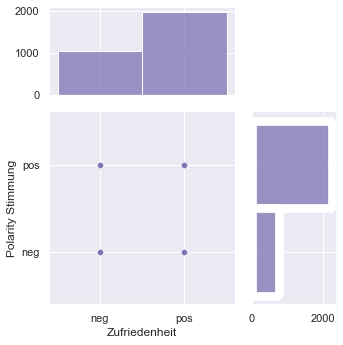

In [31]:
#%matplotlib inline
sns.set_theme(style="darkgrid")
g = sns.jointplot(data=df, x="Zufriedenheit", y="Polarity Stimmung", height=5, ratio=2, marginal_ticks=True, color="m")


<AxesSubplot:xlabel='Gesamt_zfh', ylabel='count'>

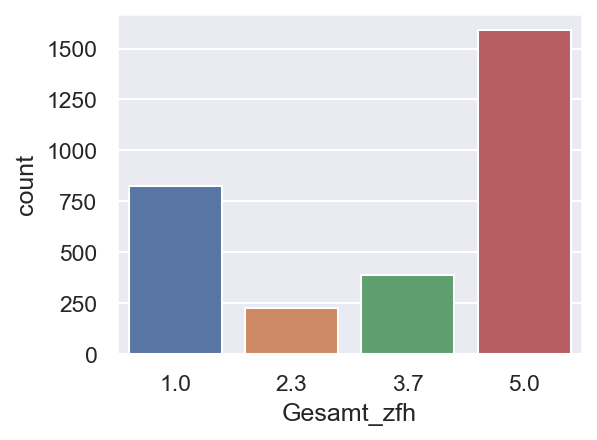

In [32]:
plt.figure(figsize=(4,3),dpi=150)
sns.countplot(x="Gesamt_zfh",data=df)

In [34]:
df.to_csv('D:/refugeeks_project/ml_py/my_df.csv', index=False)

<h1 style="text-align:center;color:azure;background-color:blue"><br> ######################<br></h1>

In [3]:
cols = list(df.columns)
cols = [x.upper().strip() for x in cols] #lower
df.columns = cols
df.head()

,KLINIKNAME,NUTZERNAME,TITEL,DATUM,BEHANDLUNGSJAHR,BERICHTET ALS,DAUMEN HOCH/RUNTER,FACHBEREICH,GESAMTZUFRIEDENHEIT,TEXTUELL GESAMTZUFRIEDENHEIT,...,AUSSTATTUNG UND GESTALTUNG,TEXTUELL AUSSTATTUNG UND GESTALTUNG,PRO,KONTRA,KRANKHEITSBILD,PRIVATPATIENT,ERFAHRUNGSBERICHT,KOMMENTARE,URL,EXTRAKTIONSDATUM
0,MediClin Seepark Klinik,Noname136,Organisation ist ein Fremdwort,19.05.2021,Jahr der Behandlung: 20121,berichtet als Patient,Kein Daumen hoch/runter,Psychosomatik,2,weniger zufrieden\n,...,2,weniger zufrieden\n,"Die Schwestern der MZ, Ernährungstherapeuten",siehe Bericht,"Bulemie, Depressionen",nein,Hatte mir mehr versprochen Die Organisation l...,Kein Kommentar,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021
1,MediClin Seepark Klinik,noname22,Es war die Hölle auf Erden,11.04.2021,Jahr der Behandlung: 18,berichtet als Patient,Daumen runter,Psychosomatik,0,unzufrieden\n,...,2,weniger zufrieden (In den Zimmern roch es nach...,die Kunsttherapie war klasse!,Therapeuten; das Essen; Ich als Patient wurde ...,Depression,nein,Es war die absolute Hölle! Die Therapeuten ka...,Kein Kommentar,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021
2,MediClin Seepark Klinik,Cl.A.,Abschlussbericht,11.04.2021,Jahr der Behandlung: 2020,berichtet als Patient,Daumen runter,Psychosomatik,0,unzufrieden (Siehe oben)\n,...,2,weniger zufrieden (Null acht fünfzehn- Program...,-,Nein siehe oben!!!!!!!,Nachsorge und Begleitung nach einer Magen-Oper...,nein,Als grundpositiv eingestellter Mensch wollte i...,Kein Kommentar,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021
3,MediClin Seepark Klinik,xx.,Zum größten Teil nicht weiter zu empfehlen,04.04.2021,Jahr der Behandlung: 2020 /21,berichtet als Patient,Kein Daumen hoch/runter,Psychosomatik,2,weniger zufrieden\n,...,2,weniger zufrieden\n,Das Essen,"Die Mitarbeiter, Chefarzt, Therapien",Anorexie,nein,Ich war für ca 5 Monate in der Klinik gewesen....,Kein Kommentar,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021
4,MediClin Seepark Klinik,Ellie.,Durchaus ein Ort zum Genesen,28.03.2021,Jahr der Behandlung: 2020,berichtet als Patient,Daumen hoch,Psychosomatik,4,zufrieden\n,...,6,sehr zufrieden\n,Direkte (aber nette) und offene Art mit der Er...,-,"Anorexie, Depressionen",nein,"Als ich in die Klinik ankam, wurde ich freundl...",Kein Kommentar,https://www.klinikbewertungen.de/klinik-forum/...,01.06.2021


In [4]:
df.dtypes


KLINIKNAME                             object
NUTZERNAME                             object
TITEL                                  object
DATUM                                  object
BEHANDLUNGSJAHR                        object
BERICHTET ALS                          object
DAUMEN HOCH/RUNTER                     object
FACHBEREICH                            object
GESAMTZUFRIEDENHEIT                     int64
TEXTUELL GESAMTZUFRIEDENHEIT           object
BERATUNGSQUALITÄT                       int64
TEXTUELL BERATUNGSQUALITÄT             object
MEDZINISCHE BEHANDLUNG                  int64
TEXTUELL MEDIZINISCHE BEHANDLUNG       object
VERWALTUNG UND ABLÄUFE                  int64
TEXTUELL VERWALTUNG UND ABLÄUFE        object
AUSSTATTUNG UND GESTALTUNG             object
TEXTUELL AUSSTATTUNG UND GESTALTUNG    object
PRO                                    object
KONTRA                                 object
KRANKHEITSBILD                         object
PRIVATPATIENT                     

In [20]:
df1 = pd.read_csv('D:/refugeeks_project/selenium_py/p1_py/kliniks_Gesamt_liste.csv', parse_dates=['Date']) #, index_col=0
df1.head()

,Klinik_Name,Title,Department,Date,Review,Rating
0,HEH Herzogin Elisabeth Hospital,Bewertung,Chirurgie,2021-09-06,['Sehr höfliche und hilfsbereite Mitarbeiter.'...,"['', '', 'Gesamtzufriedenheit:', 'sehr zufried..."
1,HEH Herzogin Elisabeth Hospital,Weiter so HEH,Chirurgie,2021-09-06,['Kann ich nur weiterempfehlen!! Sehr gutes Pf...,"['', '', 'Gesamtzufriedenheit:', 'sehr zufried..."
2,HEH Herzogin Elisabeth Hospital,Superklinik,Orthopädie,2021-07-06,['Bestens durchorganisiert.gutes Personal geht...,"['', '', 'Gesamtzufriedenheit:', 'sehr zufried..."
3,HEH Herzogin Elisabeth Hospital,Kranken- oder Hotelzimmer?,BeuleKeule2110,2021-05-25,"[""Bin nach einem Autounfall im HEH gewesen und...","['', '', 'Gesamtzufriedenheit:', 'sehr zufried..."
4,HEH Herzogin Elisabeth Hospital,Knie OP,Orthopädie,2021-11-05,['Wurde bereits im Sept. 2020 am Knie operiert...,"['', '', 'Gesamtzufriedenheit:', 'sehr zufried..."


In [25]:
# Access a group of rows and columns (in a .DataFrame)
df1.loc[1, 'Review']  

"['Kann ich nur weiterempfehlen!! Sehr gutes Pflegepersonal und Ärzte!!????']"

In [21]:
df1_d = dict(zip(df1.index.unique(), df1.Klinik_Name.unique()))
df1_d

{0: 'HEH Herzogin Elisabeth Hospital',
 1: 'Klinik Am Zuckerberg',
 2: 'Klinikum Wolfsburg',
 3: 'Klinikum Peine gGmbH',
 4: 'Krankenhaus St. Martini',
 5: 'DIAKOVERE Henriettenstift',
 6: 'Eilenriede Klinik Hannover',
 7: 'Sophienklinik GmbH',
 8: 'KRH Klinikum Agness Karll Laatzen',
 9: 'Klinikum Wahrendorff',
 10: 'AMEOS Klinikum Hildesheim',
 11: 'Helios Kliniken Mittelweser - Krankenhaus Nienburg',
 12: 'HELIOS Klinik Cuxhaven',
 13: 'AMEOS Klinikum Seepark Geestland',
 14: 'Kreiskrankenhaus Buchholz',
 15: 'Kreiskrankenhaus Winsen',
 16: 'Psychiatrische Klinik Lüneburg',
 17: 'Agaplesion - Diakonieklinikum Rotenburg',
 18: 'Kreiskrankenhaus Osterholz',
 19: 'Klinik Fallingbostel',
 20: 'MediClin Klinikum Soltau',
 21: 'Heidekreis-Klinikum GmbH - Krankenhaus Walsrode',
 22: 'Elbe Kliniken Stade - Buxtehude, Standort Buxtehude',
 23: 'Diana Klinik-Fachklinik für Physikalische Medizin'}

In [9]:
df1.dtypes

Klinik_Name            object
Title                  object
Department             object
Date           datetime64[ns]
Review                 object
Rating                 object
dtype: object

In [10]:
df1.shape

(960, 6)

In [11]:
df1.size

5760

In [12]:
len(df1)

960

In [13]:
df1.info

<bound method DataFrame.info of                                            Klinik_Name  \
0                      HEH Herzogin Elisabeth Hospital   
1                      HEH Herzogin Elisabeth Hospital   
2                      HEH Herzogin Elisabeth Hospital   
3                      HEH Herzogin Elisabeth Hospital   
4                      HEH Herzogin Elisabeth Hospital   
..                                                 ...   
955  Diana Klinik-Fachklinik für Physikalische Medizin   
956  Diana Klinik-Fachklinik für Physikalische Medizin   
957  Diana Klinik-Fachklinik für Physikalische Medizin   
958  Diana Klinik-Fachklinik für Physikalische Medizin   
959  Diana Klinik-Fachklinik für Physikalische Medizin   

                                         Title      Department       Date  \
0                                    Bewertung       Chirurgie 2021-09-06   
1                                Weiter so HEH       Chirurgie 2021-09-06   
2                                  Super

In [18]:
df1.index

RangeIndex(start=0, stop=960, step=1)

In [19]:
df1.columns

Index(['Klinik_Name', 'Title', 'Department', 'Date', 'Review', 'Rating'], dtype='object')

In [23]:
vals = df1.values

In [27]:
df2 = pd.read_csv('D:/refugeeks_project/Beispieldatensatz GoogleMaps.csv')
df2.head(100)

,Klinik,Nutzername,Local Guide,Anzahl geschriebener Rezensionen,Erfahrungsbericht,Sterne,Datum der Rezension,Likes,Antwort,Datum der Antwort,URL,Extraktionsdatum
0,MEDICLIN Seepark Klinik,Katrin Frankenfeld,Ja,14 Rezensionen,Kein Text,5 Sterne,vor einem Monat,0,Keine Antwort,Kein Datum,https://www.google.com/maps/place/MEDICLIN+See...,01.06.2021
1,MEDICLIN Seepark Klinik,Uwe,Nein,2 Rezensionen,Päckchen trotz mehrfacher Nachfrage nicht zurü...,1 Stern,vor 3 Monaten,1,Keine Antwort,Kein Datum,https://www.google.com/maps/place/MEDICLIN+See...,01.06.2021
2,MEDICLIN Seepark Klinik,Tashha B,Nein,21 Rezensionen,Fühle mich missverstanden und wenig gut betreu...,2 Sterne,vor 3 Monaten,0,Keine Antwort,Kein Datum,https://www.google.com/maps/place/MEDICLIN+See...,01.06.2021
3,MEDICLIN Seepark Klinik,K N,Nein,6 Rezensionen,Ich warte seit letztem Jahr Juni auf den Besch...,1 Stern,vor 3 Monaten,6,Keine Antwort,Kein Datum,https://www.google.com/maps/place/MEDICLIN+See...,01.06.2021
4,MEDICLIN Seepark Klinik,EinhornHoodie,Nein,1 Rezension,War mit 10 da wurde gezwungen das zu essen was...,1 Stern,vor 3 Monaten,3,Keine Antwort,Kein Datum,https://www.google.com/maps/place/MEDICLIN+See...,01.06.2021
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Helios Klinikum Uelzen,Heinz Güthling,Ja,28 Rezensionen,"Sonntag, 09. August 2020\n\nNach Realisierung,...",5 Sterne,vor 9 Monaten,2,Keine Antwort,Kein Datum,https://www.google.com/maps/place/Helios+Klini...,01.06.2021
96,Helios Klinikum Uelzen,nekonicki_ nyaa,Nein,1 Rezension,Man kam mit rechten Unterbauch Schmerzen an un...,1 Stern,vor 9 Monaten,2,Keine Antwort,Kein Datum,https://www.google.com/maps/place/Helios+Klini...,01.06.2021
97,Helios Klinikum Uelzen,Bewertungs_ BOSS,Ja,58 Rezensionen,Zuerst sollte man zwischen den ganzen Bewertun...,4 Sterne,vor 10 Monaten,2,Keine Antwort,Kein Datum,https://www.google.com/maps/place/Helios+Klini...,01.06.2021
98,Helios Klinikum Uelzen,0482,Ja,13 Rezensionen,Mehr Hospiz als Hospital!\nUnprofessionalität ...,1 Stern,vor 10 Monaten,3,Keine Antwort,Kein Datum,https://www.google.com/maps/place/Helios+Klini...,01.06.2021


In [38]:
for index in df2.index:
    if df2.loc[index,'Sterne'] == '5 Sterne ':
        df2.loc[index,'Sterne'] = '5'
df2

,Klinik,Nutzername,Local Guide,Anzahl geschriebener Rezensionen,Erfahrungsbericht,Sterne,Datum der Rezension,Likes,Antwort,Datum der Antwort,URL,Extraktionsdatum
0,MEDICLIN Seepark Klinik,Katrin Frankenfeld,Ja,14 Rezensionen,Kein Text,5 Sterne,vor einem Monat,0,Keine Antwort,Kein Datum,https://www.google.com/maps/place/MEDICLIN+See...,01.06.2021
1,MEDICLIN Seepark Klinik,Uwe,Nein,2 Rezensionen,Päckchen trotz mehrfacher Nachfrage nicht zurü...,1 Stern,vor 3 Monaten,1,Keine Antwort,Kein Datum,https://www.google.com/maps/place/MEDICLIN+See...,01.06.2021
2,MEDICLIN Seepark Klinik,Tashha B,Nein,21 Rezensionen,Fühle mich missverstanden und wenig gut betreu...,2 Sterne,vor 3 Monaten,0,Keine Antwort,Kein Datum,https://www.google.com/maps/place/MEDICLIN+See...,01.06.2021
3,MEDICLIN Seepark Klinik,K N,Nein,6 Rezensionen,Ich warte seit letztem Jahr Juni auf den Besch...,1 Stern,vor 3 Monaten,6,Keine Antwort,Kein Datum,https://www.google.com/maps/place/MEDICLIN+See...,01.06.2021
4,MEDICLIN Seepark Klinik,EinhornHoodie,Nein,1 Rezension,War mit 10 da wurde gezwungen das zu essen was...,1 Stern,vor 3 Monaten,3,Keine Antwort,Kein Datum,https://www.google.com/maps/place/MEDICLIN+See...,01.06.2021
...,...,...,...,...,...,...,...,...,...,...,...,...
2896,Bundeswehrkrankenhaus Westerstede,Melanie Reich,Nein,Keine Angabe,Kein Text,5 Sterne,vor 5 Jahren,0,Keine Antwort,Kein Datum,https://www.google.com/maps/place/Bundeswehrkr...,01.06.2021
2897,Bundeswehrkrankenhaus Westerstede,Detlef Bolte,Ja,28 Rezensionen,Kein Text,4 Sterne,vor 6 Jahren,0,Keine Antwort,Kein Datum,https://www.google.com/maps/place/Bundeswehrkr...,01.06.2021
2898,Bundeswehrkrankenhaus Westerstede,Dennis Treichel,Ja,10 Rezensionen,Gute Ärzte und super Service!,4 Sterne,vor 7 Jahren,0,Keine Antwort,Kein Datum,https://www.google.com/maps/place/Bundeswehrkr...,01.06.2021
2899,Bundeswehrkrankenhaus Westerstede,Exilnorddeutscher,Nein,2 Rezensionen,"Kompetente Ärzte, tolles Ambiente",5 Sterne,vor 7 Jahren,0,Keine Antwort,Kein Datum,https://www.google.com/maps/place/Bundeswehrkr...,01.06.2021
